# Movies on Netflix, Prime Video, Hulu and Disney+

**Content**

The dataset is an amalgamation of:
-data that was scraped from Reelgood.com, which comprised a comprehensive list of movies available on various streaming platforms
-IMDb dataset

**Inspiration**

* Which streaming platform(s) can I find this movie on?
* Average IMDb ratings of a movie produced in a country?
* Target age group movies vs the streaming application they can be found on
* The year during which a movie was produced and the streaming platform they can be found on
* Analysis of the popularity of a movie vs directors

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data_movies = pd.read_csv("MoviesOnStreamingPlatforms.csv/MoviesOnStreamingPlatforms_updated.csv")

In [3]:
data_movies.head()

,Unnamed: 0,ID,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,0,1,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,1,2,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,2,3,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,3,4,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,4,5,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [4]:
columns = data_movies.columns.values.tolist()
columns

['Unnamed: 0',
 'ID',
 'Title',
 'Year',
 'Age',
 'IMDb',
 'Rotten Tomatoes',
 'Netflix',
 'Hulu',
 'Prime Video',
 'Disney+',
 'Type',
 'Directors',
 'Genres',
 'Country',
 'Language',
 'Runtime']

In [5]:
data_movies.drop([columns[0], columns[1]], axis = 1, inplace = True)

In [6]:
data_movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87%,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87%,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84%,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96%,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97%,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


In [7]:
data_movies.shape

(16744, 15)

In [15]:
# Eliminamos los Na que existan en el datset
data_movies.dropna(axis=0, how="any", inplace = True)

In [9]:
data_movies.shape

(3301, 15)

In [10]:
data_movies["Rotten Tomatoes"].dtype

dtype('O')

In [19]:
# Modificamos el formato de los valores de la columna Rotten Tomatoes ya que se trata de Strings, 
# los convertimos a float para poder analizar estos datos

data_movies["Rotten Tomatoes"].replace('[\%,]', '.0', regex=True, inplace=True)
data_movies["Rotten Tomatoes"].astype(float)
data_movies.head()

,Title,Year,Age,IMDb,Rotten Tomatoes,Netflix,Hulu,Prime Video,Disney+,Type,Directors,Genres,Country,Language,Runtime
0,Inception,2010,13+,8.8,87.0,1,0,0,0,0,Christopher Nolan,"Action,Adventure,Sci-Fi,Thriller","United States,United Kingdom","English,Japanese,French",148.0
1,The Matrix,1999,18+,8.7,87.0,1,0,0,0,0,"Lana Wachowski,Lilly Wachowski","Action,Sci-Fi",United States,English,136.0
2,Avengers: Infinity War,2018,13+,8.5,84.0,1,0,0,0,0,"Anthony Russo,Joe Russo","Action,Adventure,Sci-Fi",United States,English,149.0
3,Back to the Future,1985,7+,8.5,96.0,1,0,0,0,0,Robert Zemeckis,"Adventure,Comedy,Sci-Fi",United States,English,116.0
4,"The Good, the Bad and the Ugly",1966,18+,8.8,97.0,1,0,1,0,0,Sergio Leone,Western,"Italy,Spain,West Germany",Italian,161.0


Text(0.5, 1.0, 'Histograma número de películas por año')

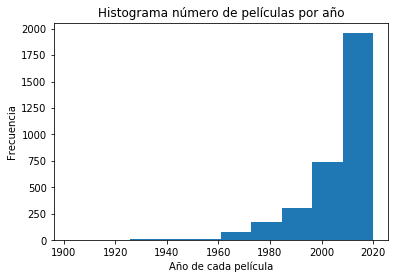

In [42]:
plt.hist(data_movies["Year"])
plt.xlabel("Año de cada película")
plt.ylabel("Frecuencia")
plt.title("Histograma número de películas por año")

Como podemos observar en el histograma el número de películas producidas ha aumentado los últimos años.
Es un mercado el auge, la industria del cine.

Text(0.5, 1.0, 'Histograma número de películas por edades')

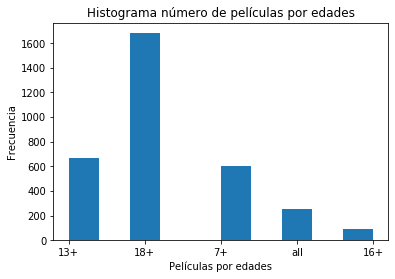

In [13]:
plt.hist(data_movies["Age"])
plt.xlabel("Películas por edades")
plt.ylabel("Frecuencia")
plt.title("Histograma número de películas por edades")

Como podemos observar en el histograma de el número de películas por edades, la clase predominante son las películas
de 18+, por lo tanto si fueramos productores seguramente eligirimos ese rango de películas para hacer nuevos proyectos.

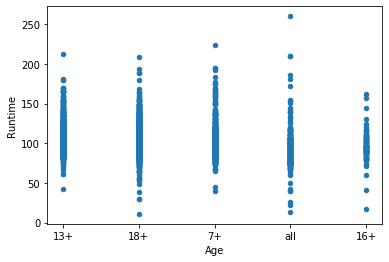

In [45]:
data_movies.plot(kind="scatter", x="Age", y="Runtime")

En el gráfico superior vemos las distribuciones por edad según los minutos de duración de la película.
Podemos observar como para todas las edades hay más afluencia de valores entre 60 y 150 min-

In [60]:
print("Número total de películas en Netflix:" +str(data_movies["Netflix"].sum()))
print("Número total de películas en Hulu:" +str(data_movies["Netflix"].sum()))
print("Número total de películas en Prime Video:" +str(data_movies["Prime Video"].sum()))
print("Número total de películas en Disney+:" +str(data_movies["Disney+"].sum()))

Número total de películas en Netflix:1000
Número total de películas en Hulu:1000
Número total de películas en Prime Video:1802
Número total de películas en Disney+:334


Como podemos ver la plataforma de Amazon cuenta con mayor número total de películas, seguida de Netflix y
el ranking lo termina Disney+. Es normal que Disney+ tenga menos películas ya que es la plaforma más reciente de 
las cuatro.

In [59]:
print("Media de películas en Netflix:" +str(data_movies["Netflix"].mean()))
print("Media de películas en Hulu:" +str(data_movies["Netflix"].mean()))
print("Media de películas en Prime Video:" +str(data_movies["Prime Video"].mean()))
print("Media de películas en Disney+:" +str(data_movies["Disney+"].mean()))

Media de películas en Netflix:0.3029385034837928
Media de películas en Hulu:0.3029385034837928
Media de películas en Prime Video:0.5458951832777946
Media de películas en Disney+:0.1011814601635868


La media nos indica lo que ya sabíamos el, 0.55% de las películas pertenecen a Amazon Prime Video.